## MLP for Binary Classification

In this lab, you will use the Ionosphere data binary (two-class) classification dataset to demonstrate an MLP for binary classification.

This dataset involves predicting whether a structure is in the atmosphere or not given radar returns.

The dataset will be downloaded automatically using Pandas, but you can learn more in the links below.

[Ionosphere Dataset (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv)

[Ionosphere Dataset Description (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.names)


Your task for this is lab is to develop a Keras-based Multi-Layer Perceptron model for this data set. Remember the number of output layers is equal to the number of classes.

Following we have provided some piece of code to you while you need to complete the rest of the code on your own.



In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Your code to import train_test_split class from sklearn. Follow link https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")

# Read the dataset from the path below. Store the data in a pandas dataframe named 'df'

Link to API - https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv")

In [3]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
# Your code to read the csv from the above path.

See the sample dataset. Print few rows of the dataset. Use dataframe.head() method.

Link to API:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

In [4]:
df.head(10)

1  0  0.99539  -0.05889  0.85243  0.02306  0.83398  -0.37708      1.1  \
0  1  0  1.00000  -0.18829  0.93035 -0.36156 -0.10868  -0.93597  1.00000   
1  1  0  1.00000  -0.03365  1.00000  0.00485  1.00000  -0.12062  0.88965   
2  1  0  1.00000  -0.45161  1.00000  1.00000  0.71216  -1.00000  0.00000   
3  1  0  1.00000  -0.02401  0.94140  0.06531  0.92106  -0.23255  0.77152   
4  1  0  0.02337  -0.00592 -0.09924 -0.11949 -0.00763  -0.11824  0.14706   
5  1  0  0.97588  -0.10602  0.94601 -0.20800  0.92806  -0.28350  0.85996   
6  0  0  0.00000   0.00000  0.00000  0.00000  1.00000  -1.00000  0.00000   
7  1  0  0.96355  -0.07198  1.00000 -0.14333  1.00000  -0.21313  1.00000   
8  1  0 -0.01864  -0.08459  0.00000  0.00000  0.00000   0.00000  0.11470   
9  1  0  1.00000   0.06655  1.00000 -0.18388  1.00000  -0.27320  1.00000   

   0.03760  ...  -0.51171  0.41078  -0.46168  0.21266  -0.34090  0.42267  \
0 -0.04549  ...  -0.26569 -0.20468  -0.18401 -0.19040  -0.11593 -0.16626   
1  0.01198  ...  -0.40220  0.58984  -0.22145  0.43100  -0.17365  0.60436   
2  0.00000  ...   0.90695  0.51613   1.00000  1.00000  -0.20099  0.25682   
3 -0.16399  ...  -0.65158  0.13290  -0.53206  0.02431  -0.62197 -0.05707   
4  0.06637  ...  -0.01535 -0.03240   0.09223 -0.07859   0.00732  0.00000   
5 -0.27342  ...  -0.81634  0.13659  -0.82510  0.04606  -0.82395 -0.04262   
6  0.00000  ...   1.00000  1.00000   1.00000  0.00000   0.00000  1.00000   
7 -0.36174  ...  -0.65440  0.57577  -0.69712  0.25435  -0.63919  0.45114   
8 -0.26810  ...  -0.01326  0.20645  -0.02294  0.00000   0.00000  0.16595   
9 -0.43107  ...  -0.89128  0.47211  -0.86500  0.40303  -0.83675  0.30996   

   -0.54487  0.18641  -0.45300  g  
0  -0.06288 -0.13738  -0.02447  b  
1  -0.24180  0.56045  -0.38238  g  
2   1.00000 -0.32382   1.00000  b  
3  -0.59573 -0.04608  -0.65697  g  
4   0.00000 -0.00039   0.12011  b  
5  -0.81318 -0.13832  -0.80975  g  
6   1.00000  0.00000   0.00000  b  
7  -0.72779  0.38895  -0.73420  g  
8   0.24086 -0.08208   0.38065  b  
9  -0.89093  0.22995  -0.89158  g  

[10 rows x 35 columns]

Print the basic info of the dataset. Use dataframe.info() from pandas library


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1          350 non-null    int64  
 1   0          350 non-null    int64  
 2   0.99539    350 non-null    float64
 3   -0.05889   350 non-null    float64
 4   0.85243    350 non-null    float64
 5   0.02306    350 non-null    float64
 6   0.83398    350 non-null    float64
 7   -0.37708   350 non-null    float64
 8   1.1        350 non-null    float64
 9   0.03760    350 non-null    float64
 10  0.85243.1  350 non-null    float64
 11  -0.17755   350 non-null    float64
 12  0.59755    350 non-null    float64
 13  -0.44945   350 non-null    float64
 14  0.60536    350 non-null    float64
 15  -0.38223   350 non-null    float64
 16  0.84356    350 non-null    float64
 17  -0.38542   350 non-null    float64
 18  0.58212    350 non-null    float64
 19  -0.32192   350 non-null    float64
 20  0.56971   

Print the shape of the dataframe. Select suitable API call from the pandas library

In [6]:
df.shape

(350, 35)

# Separate the input and output from the dataframe. Input is all columns besides last column. Output is the last column.


In [7]:
X = df.values[:, :-1]
y = df.values[:, -1]

We have converted everthing in X to 'float' and the letters in column y to the numbers in the following cell.

In [8]:
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)

Printing the genral information of the X and y in the following cell

In [9]:
print(X)
print(y)
# your code to print shape of X. Remember X is a numpy array
# your code to print shape of y. Remember y is a numpy array


[[ 1.       0.       1.      ... -0.06288 -0.13738 -0.02447]
 [ 1.       0.       1.      ... -0.2418   0.56045 -0.38238]
 [ 1.       0.       1.      ...  1.      -0.32382  1.     ]
 ...
 [ 1.       0.       0.94701 ...  0.00442  0.92697 -0.00577]
 [ 1.       0.       0.90608 ... -0.03757  0.87403 -0.16243]
 [ 1.       0.       0.8471  ... -0.06678  0.85764 -0.06151]]
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [10]:
X.shape


(350, 34)

In [11]:
y.shape

(350,)

* Separate X and y into training and test set with a ratio of your choice.
* Print the shapes of the resulting arrays.
* Get the number of features from X_train. Remember the number of features are the number of inputs.

Use sklearn train_test_split class.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train)

print(X_test)

print(y_train)

print(y_test)

n_features = X_train.shape[1]

[[ 1.       0.       0.97513 ...  0.06217  0.98934  0.09947]
 [ 1.       0.       0.33333 ... -0.14809  0.08333 -0.5    ]
 [ 1.       0.       0.76627 ... -0.24648 -0.11894 -0.27218]
 ...
 [ 1.       0.       0.47938 ...  0.04124  0.45361 -0.51546]
 [ 1.       0.       0.90608 ... -0.03757  0.87403 -0.16243]
 [ 1.       0.       0.95704 ... -0.31857  0.69531 -0.41573]]
[[ 1.       0.       0.08696 ... -0.07323  0.1167  -0.06865]
 [ 1.       0.       0.82254 ... -0.0422   0.78439  0.01214]
 [ 1.       0.       0.89589 ... -0.07029  0.76862  0.27926]
 ...
 [ 1.       0.       0.83427 ...  0.70011 -0.03983  0.79444]
 [ 1.       0.       0.90374 ...  0.09091  0.97861  0.06417]
 [ 1.       0.       1.      ... -0.51329  0.18353 -0.46603]]
[1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1
 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0
 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                350       
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
 dense_2 (Dense)             (None, 4)                 32        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 464 (1.81 KB)
Trainable params: 464 (1.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Creating a Multi-layer Perceptron using Keras.
We have added first and last layers. Create the hidden layers of your choise.
You can chose any number of hidden layers and activation function of your chose
https://keras.io/api/layers/core_layers/dense/

In [21]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
#
model.add(Dense(7, activation='relu', input_shape=(n_features,)))

model.add(Dense(4, activation='relu', input_shape=(n_features,)))

model.add(Dense(1, activation='sigmoid'))

In the next cell, we trained the above neural network model and tested its accuracy. As this concept has still not benn covered in the class, just run the code to check the accuracy.

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.948


** How much accuracy have you got? Compare the accuracy with your peers. **
** Now, change your model and activation function to get the better accuracy as compared to your peers **

## **Important:** Document in your lab logbook the accuracy of the improved model. Do not include any code or explanations in your lab logbook. Simply record the accuracy. For example, if the obtained accuracy is 0.98, then enter "0.98" in your lab logbook.

## In addition to the accuracy, also document the output of the neural network as provided in Task 2.



Next, we have provided the code to predict on an unknown value.
We will cover these concepts later in the class. For now, just run the code to see the prediction.

In [16]:
row = [1,0,0.99539,-0.05889,0.85243,0.02306,
       0.83398,-0.37708,1,0.03760,0.85243,-0.17755,
       0.59755,-0.44945,0.60536,-0.38223,0.84356,
       -0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,
       -0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,
       -0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

1/1 [==============================] - 0s 106ms/step
Predicted: 1.000


Epoch 1/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 0.6325
Epoch 2/150
8/8 [==============================] - 0s 1ms/step - loss: 0.0182 - accuracy: 0.6325
Epoch 3/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.6325
Epoch 4/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.6325
Epoch 5/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0178 - accuracy: 0.6325
Epoch 6/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 0.6325
Epoch 7/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 0.6325
Epoch 8/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 0.6325
Epoch 9/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.6325
Epoch 10/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0171 - accuracy: 0.6325
Epoch 11/150
8/8 [===========

8/8 [==============================] - 0s 1ms/step - loss: 0.0090 - accuracy: 0.6325
Epoch 85/150
8/8 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.6325
Epoch 86/150
8/8 [==============================] - 0s 1ms/step - loss: 0.0092 - accuracy: 0.6325
Epoch 87/150
8/8 [==============================] - 0s 1ms/step - loss: 0.0109 - accuracy: 0.6325
Epoch 88/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 0.6325
Epoch 89/150
8/8 [==============================] - 0s 1ms/step - loss: 0.0090 - accuracy: 0.6325
Epoch 90/150
8/8 [==============================] - 0s 1ms/step - loss: 0.0090 - accuracy: 0.6325
Epoch 91/150
8/8 [==============================] - 0s 1ms/step - loss: 0.0086 - accuracy: 0.6325
Epoch 92/150
8/8 [==============================] - 0s 1ms/step - loss: 0.0084 - accuracy: 0.6325
Epoch 93/150
8/8 [==============================] - 0s 1ms/step - loss: 0.0083 - accuracy: 0.6325
Epoch 94/150
8/8 [===============

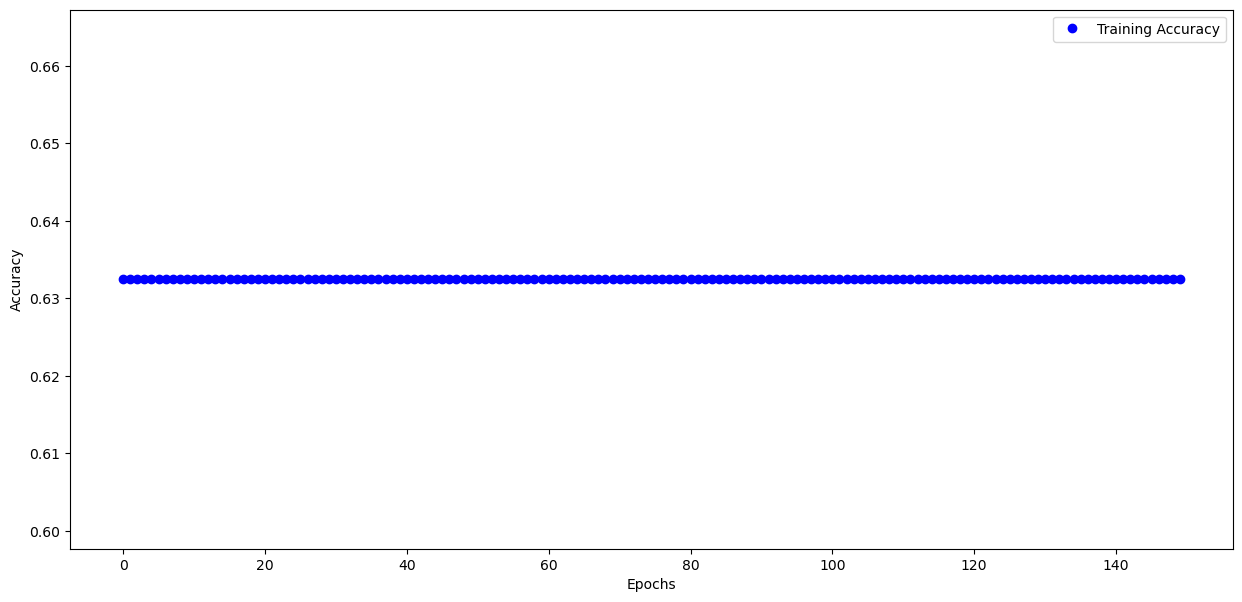

In [17]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

history_dict = history.history
Accuracy = history_dict['accuracy']
plt.figure(num=1, figsize=(15,7))
plt.plot(Accuracy, 'bo', label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Try out the same model with Keras Functional models!
Refer to [Keras](https://keras.io/) for more details and tutorials for the same.